Using kernel_PLS

In [3]:
library(plsRglm)
library(caret)

library(tidyverse)
library(bestNormalize)

Get the data

In [4]:
Data_red <- read.csv(file="winequality-red.csv", header=TRUE, sep=";")

Data_white <- 
read.csv(file="winequality-white.csv", header=TRUE, sep=";")

data <- rbind(Data_red, Data_white)

head(Data_red)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


### Find optimal number of components using cross validation

Use 10 fold cross validation with maximum 10 components to estimate how many components should be used to predict the red wine quality

In [15]:
set.seed(123)
cv.modpls<-cv.plsR(quality~.,data=Data_red_norm,nt=11,K=10,NK=100,random=TRUE,verbose = FALSE)

In [16]:
res.cv.modpls=cvtable(summary(cv.modpls))

____************************************************____
____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Component____ 4 ____
____Component____ 5 ____
____Component____ 6 ____
____Component____ 7 ____
____Component____ 8 ____
____Component____ 9 ____
____Component____ 10 ____
____Component____ 11 ____
____Predicting X without NA neither in X nor in Y____
****________________________________________________****


NK: 1,  2,  3,  4,  5,  6,  7,  8,  9,  10
NK: 11,  12,  13,  14,  15,  16,  17,  18,  19,  20
NK: 21,  22,  23,  24,  25,  26,  27,  28,  29,  30
NK: 31,  32,  33,  34,  35,  36,  37,  38,  39,  40
NK: 41,  42,  43,  44,  45,  46,  47,  48,  49,  50
NK: 51,  52,  53,  54,  55,  56,  57,  58,  59,  60
NK: 61,  62,  63,  64,  65,  66,  67,  68,  69,  70
NK: 71,  72,  73,  74,  75,  76,  77,  78,  79,  80
NK: 81,  82,  83,  84,  85,  86,  87,  88,  89,  90
NK: 91,  92,  93,  94,  95,  96,  97,  98,  99,  100

CV Q2 criterion:
  0   1 
  0 100 

CV P

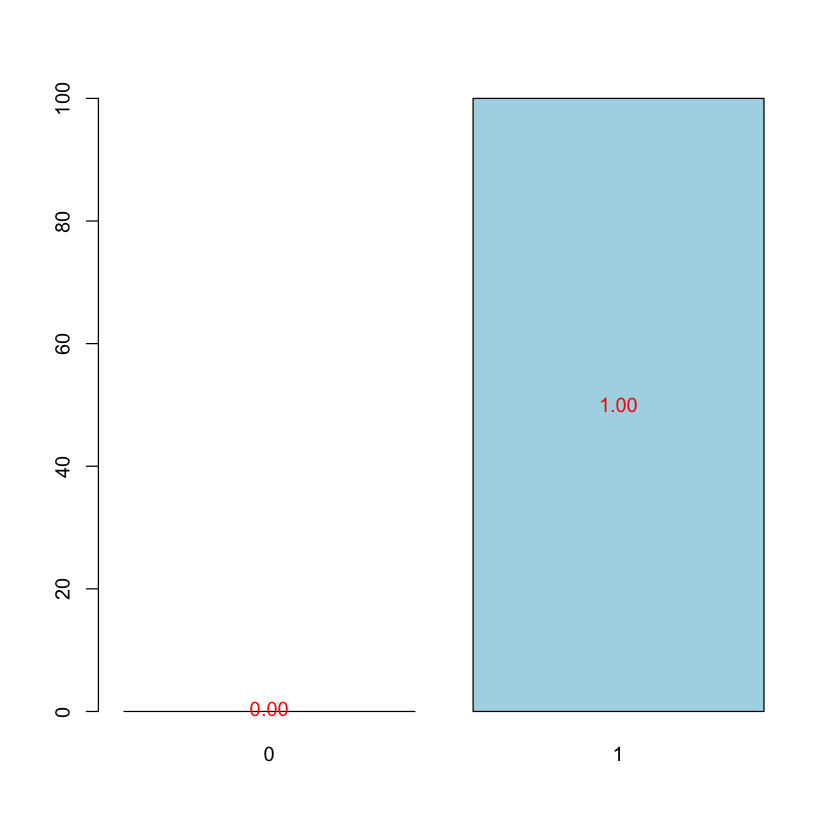

In [17]:
plot(res.cv.modpls)

In [18]:
res<-plsR(quality~.,data=Data_red_norm,nt=1,pvals.expli=TRUE)

____************************************************____
____Component____ 1 ____
____Predicting X without NA neither in X nor in Y____
****________________________________________________****



In [19]:
res

Number of required components:
[1] 1
Number of successfully computed components:
[1] 1
Coefficients:
                            [,1]
Intercept             5.63509590
fixed.acidity         0.04477326
volatile.acidity     -0.16643322
citric.acid           0.09486135
residual.sugar        0.01438168
chlorides            -0.08363299
free.sulfur.dioxide  -0.02015193
total.sulfur.dioxide -0.07290701
density              -0.07626297
pH                   -0.02529236
sulphates             0.14719772
alcohol               0.19231780
Information criteria and Fit statistics:
               AIC     RSS_Y      R2_Y R2_residY RSS_residY  AIC.std  DoF.dof
Nb_Comp_0 3857.269 1042.1651        NA        NA    1598.00 4540.765 1.000000
Nb_Comp_1 3203.267  691.4553 0.3365204 0.3365204    1060.24 3886.764 6.691218
          sigmahat.dof   AIC.dof   BIC.dof  GMDL.dof DoF.naive sigmahat.naive
Nb_Comp_0    0.8075694 0.6525763 0.6547694 -332.4282         1      0.8075694
Nb_Comp_1    0.6587674 0.4360619 0.4458

In [20]:
res$wwetoile

,Coord_Comp_1
fixed.acidity,0.13145058
volatile.acidity,-0.48850943
citric.acid,0.27221172
residual.sugar,0.04206886
chlorides,-0.24558422
free.sulfur.dioxide,-0.05873806
total.sulfur.dioxide,-0.21390394
density,-0.22397623
pH,-0.07427190
sulphates,0.43206330


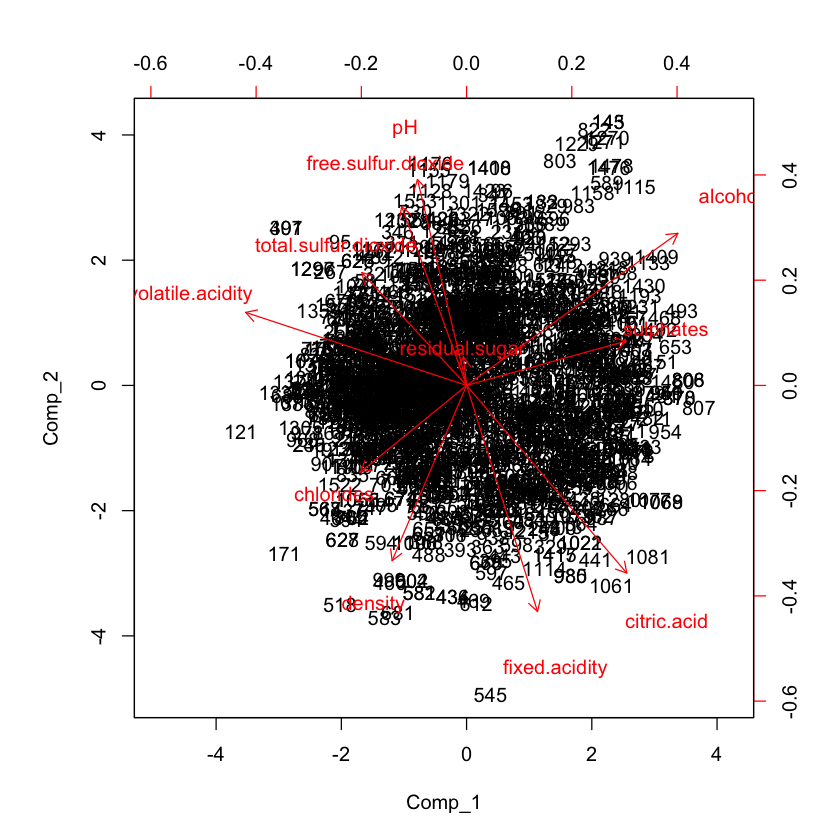

In [21]:
biplot(res6$tt,res6$pp)

## Build some test model for quality prediciton 

In [23]:
modpls3 <- plsR(quality~.,data=Data_red_norm,1,sparse=TRUE,sparseStop=FALSE)

____************************************************____
No significant predictors (<0.05) found
Warning only one standard component (without sparse option) was thus extracted
____Component____ 1 ____
____Predicting X without NA neither in X nor in Y____
****________________________________________________****



In [24]:
y_predict <- predict(modpls3)
y_predict <- data.frame(y_predict)

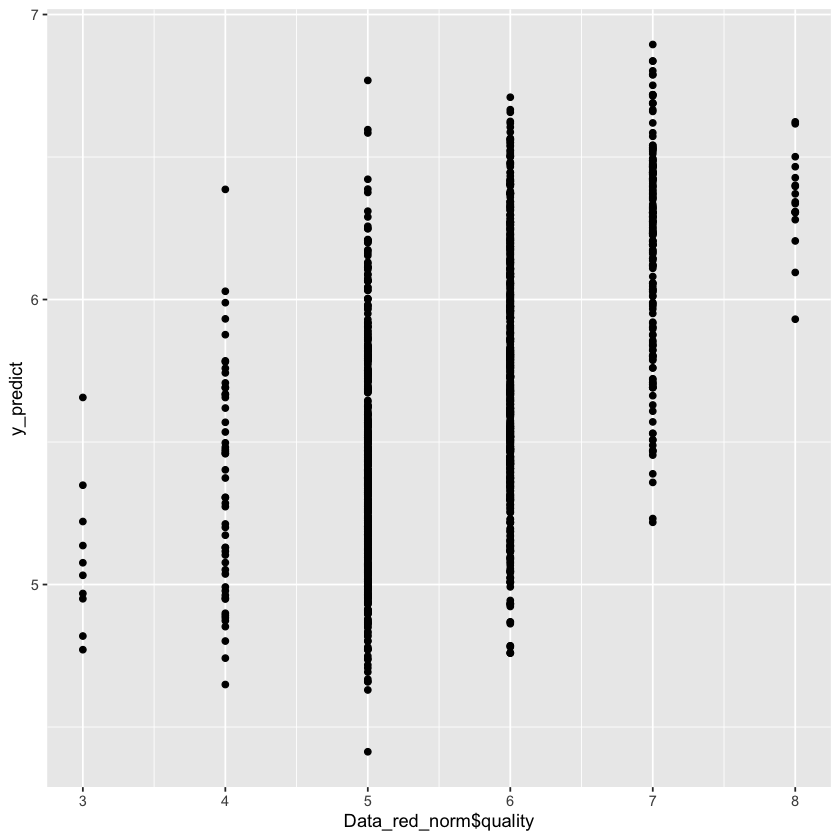

In [25]:
y_predict %>%
  ggplot(aes(Data_red_norm$quality, y_predict)) +
    geom_point()


In [26]:
data.frame(
  RMSE = caret::RMSE(y_predict$y_predict, Data_red_norm$quality),
  Rsquare = caret::R2(y_predict$y_predict, Data_red_norm$quality)
)

RMSE,Rsquare
<dbl>,<dbl>
0.657594,0.3365204


### Try more complicate model

In [27]:
cv.modpls<-cv.plsRglm(quality~.,data=Data_red_norm,nt=10,K=10,
                      modele="pls-glm-family",family=gaussian())


Family: gaussian 
Link function: identity 

NK: 1 
Number of groups : 10 
1 
____************************************************____

Family: gaussian 
Link function: identity 

____Predicting X without NA neither in X nor in Y____
____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Component____ 4 ____
____Component____ 5 ____
____Component____ 6 ____
____Component____ 7 ____
____Component____ 8 ____
____Component____ 9 ____
____Component____ 10 ____
****________________________________________________****

2 
____************************************************____

Family: gaussian 
Link function: identity 

____Predicting X without NA neither in X nor in Y____
____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Component____ 4 ____
____Component____ 5 ____
____Component____ 6 ____
____Component____ 7 ____
____Component____ 8 ____
____Component____ 9 ____
____Component____ 10 ____
****___________________________________________

In [28]:
cvtable(summary(cv.modpls))

____************************************************____

Family: gaussian 
Link function: identity 

____Component____ 1 ____
____Component____ 2 ____
____Component____ 3 ____
____Component____ 4 ____
____Component____ 5 ____
____Component____ 6 ____
____Component____ 7 ____
____Component____ 8 ____
____Component____ 9 ____
____Component____ 10 ____
____Predicting X without NA neither in X or Y____
****________________________________________________****


NK: 1

CV Q2Chi2 criterion:
0 1 
0 1 

CV PreChi2 criterion:
 1  2  3  4  5  6  7  8  9 10 
 0  0  0  0  0  0  0  0  0  1 


In [29]:
modpls_g <-plsRglm(quality~.,data=Data_red_norm,1,
                      modele="pls-glm-family",family=gaussian())

____************************************************____

Family: gaussian 
Link function: identity 

____Component____ 1 ____
____Predicting X without NA neither in X or Y____
****________________________________________________****



In [30]:
y_predict <- predict(modpls_g)
y_predict <- data.frame(y_predict)

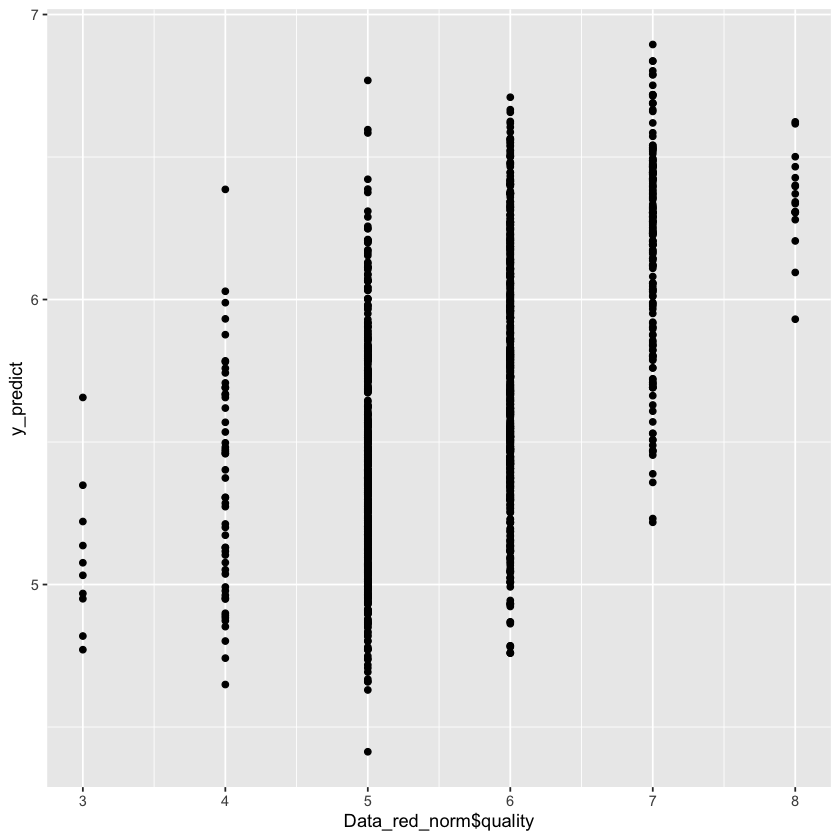

In [31]:
y_predict %>%
  ggplot(aes(Data_red_norm$quality, y_predict)) +
    geom_point()

In [32]:
data.frame(
  RMSE = caret::RMSE(y_predict$y_predict, Data_red_norm$quality),
  Rsquare = caret::R2(y_predict$y_predict, Data_red_norm$quality)
)

RMSE,Rsquare
<dbl>,<dbl>
0.657594,0.3365204


## Use kernel method

In [33]:
X = subset(Data_red, select = -c(quality) )
Y = subset(Data_red, select = c(quality) )

In [34]:
set.seed(8520)

indx <- createFolds(Y, returnTrain = TRUE)
ctrl <- trainControl(method = "cv", 
                     index = indx)

In [35]:
# Split the data into training and test set
set.seed(123)
training.samples <- Data_red_norm$quality %>%
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- Data_red_norm[training.samples, ]
test.data <- Data_red_norm[-training.samples, ]


In [36]:
X_train = subset(train.data, select = -c(quality) )
y_train = subset(train.data, select = c(quality) )

In [41]:
plsTune <- train(x = data, y = data$quality,
                 method = "kernelpls")

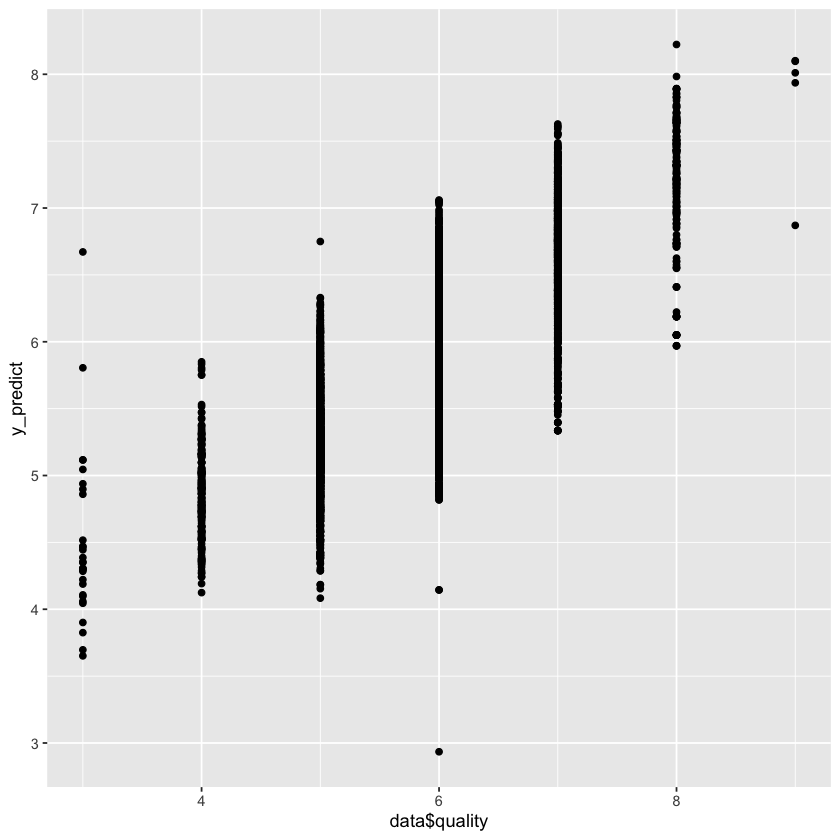

In [42]:
y_predict <- predict(plsTune, data)

y_predict = as.data.frame(y_predict)

y_predict %>%
  ggplot(aes(data$quality, y_predict)) +
    geom_point()

In [44]:
data.frame(
  MAE = caret::MAE(y_predict$y_predict, data$quality),
  Rsquare = caret::R2(y_predict$y_predict, data$quality)
)

MAE,Rsquare
<dbl>,<dbl>
0.4028461,0.6401991
